In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from psynlig import pca_explained_variance_bar
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import itertools

df = pd.read_csv('jan_2019_games_arenas_1_to_13.csv')
df

,timestamp,arena_id,tag,opp_tag,has_won,player_deck,opp_deck
0,2019-01-01 00:00:46,8,8L9GQVVUL,9QRV2V888,1.0,balloon_barbarian-barrel_elixir-collector_fire...,bomb-tower_executioner_ice-wizard_inferno-towe...
1,2019-01-01 00:02:00,13,92GLVGQU,9PVGG0JUQ,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,baby-dragon_bats_dart-goblin_electro-wizard_fl...
2,2019-01-01 00:02:21,12,8RPVVVRPV,JP0VC992,1.0,goblin-barrel_hog-rider_inferno-tower_minion-h...,bandit_battle-ram_electro-wizard_fireball_mini...
3,2019-01-01 00:03:12,12,Y0PQGY0R,2L0RUP82R,0.0,arrows_balloon_electro-wizard_ice-wizard_infer...,clone_executioner_fireball_giant-skeleton_mine...
4,2019-01-01 00:03:42,13,92GLVGQU,P2L989LCR,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,bats_clone_elixir-collector_executioner_golem_...
...,...,...,...,...,...,...,...
16129083,2019-01-31 22:14:34,2,P9J2VV29J,PP0U2QRRL,1.0,archers_fireball_giant_knight_mini-pekka_muske...,archers_arrows_fireball_hog-rider_knight_mini-...
16129084,2019-01-31 22:19:07,2,P9J2VV29J,PP0CRP9CV,0.0,archers_fireball_giant_goblin-hut_knight_mini-...,arrows_fireball_giant_knight_mini-pekka_musket...
16129085,2019-01-31 22:22:54,2,P9J2VV29J,PY09QU28Y,1.0,archers_fireball_giant_goblins_knight_mini-pek...,arrows_fireball_giant_goblin-hut_hog-rider_min...
16129086,2019-01-31 22:28:00,2,P9J2VV29J,9UG28GQ2U,0.0,archers_fireball_giant_goblins_knight_mini-pek...,baby-dragon_bomber_fireball_giant_hog-rider_mi...


In [22]:
player_deck = set()
for v in df['player_deck'].values:
    for elem in v.split('_'):
        player_deck.add(elem)
player_deck

{'archers',
 'arrows',
 'baby-dragon',
 'balloon',
 'bandit',
 'barbarian-barrel',
 'barbarian-hut',
 'barbarians',
 'bats',
 'battle-ram',
 'bomb-tower',
 'bomber',
 'bowler',
 'cannon',
 'cannon-cart',
 'clone',
 'dark-prince',
 'dart-goblin',
 'electro-dragon',
 'electro-wizard',
 'elite-barbarians',
 'elixir-collector',
 'executioner',
 'fire-spirits',
 'fireball',
 'flying-machine',
 'freeze',
 'furnace',
 'giant',
 'giant-skeleton',
 'giant-snowball',
 'goblin-barrel',
 'goblin-gang',
 'goblin-giant',
 'goblin-hut',
 'goblins',
 'golem',
 'graveyard',
 'guards',
 'heal',
 'hog-rider',
 'hunter',
 'ice-golem',
 'ice-spirit',
 'ice-wizard',
 'inferno-dragon',
 'inferno-tower',
 'knight',
 'lava-hound',
 'lightning',
 'lumberjack',
 'magic-archer',
 'mega-knight',
 'mega-minion',
 'miner',
 'mini-pekka',
 'minion-horde',
 'minions',
 'mirror',
 'mortar',
 'musketeer',
 'night-witch',
 'pekka',
 'poison',
 'prince',
 'princess',
 'rage',
 'ram-rider',
 'rascals',
 'rocket',
 'royal-g

In [23]:
for elem in player_deck:
    df[elem] = df['player_deck'].map(lambda x: elem in x)
df

,timestamp,arena_id,tag,opp_tag,has_won,player_deck,opp_deck,baby-dragon,cannon-cart,bomber,...,barbarians,mini-pekka,hunter,lumberjack,giant-snowball,electro-wizard,giant,tombstone,elixir-collector,battle-ram
0,2019-01-01 00:00:46,8,8L9GQVVUL,9QRV2V888,1.0,balloon_barbarian-barrel_elixir-collector_fire...,bomb-tower_executioner_ice-wizard_inferno-towe...,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2019-01-01 00:02:00,13,92GLVGQU,9PVGG0JUQ,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,baby-dragon_bats_dart-goblin_electro-wizard_fl...,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2019-01-01 00:02:21,12,8RPVVVRPV,JP0VC992,1.0,goblin-barrel_hog-rider_inferno-tower_minion-h...,bandit_battle-ram_electro-wizard_fireball_mini...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2019-01-01 00:03:12,12,Y0PQGY0R,2L0RUP82R,0.0,arrows_balloon_electro-wizard_ice-wizard_infer...,clone_executioner_fireball_giant-skeleton_mine...,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,2019-01-01 00:03:42,13,92GLVGQU,P2L989LCR,1.0,baby-dragon_balloon_barbarian-barrel_bowler_fr...,bats_clone_elixir-collector_executioner_golem_...,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16129083,2019-01-31 22:14:34,2,P9J2VV29J,PP0U2QRRL,1.0,archers_fireball_giant_knight_mini-pekka_muske...,archers_arrows_fireball_hog-rider_knight_mini-...,False,False,False,...,False,True,False,False,False,False,True,False,False,False
16129084,2019-01-31 22:19:07,2,P9J2VV29J,PP0CRP9CV,0.0,archers_fireball_giant_goblin-hut_knight_mini-...,arrows_fireball_giant_knight_mini-pekka_musket...,False,False,False,...,False,True,False,False,False,False,True,True,False,False
16129085,2019-01-31 22:22:54,2,P9J2VV29J,PY09QU28Y,1.0,archers_fireball_giant_goblins_knight_mini-pek...,arrows_fireball_giant_goblin-hut_hog-rider_min...,False,False,False,...,False,True,False,False,False,False,True,False,False,False
16129086,2019-01-31 22:28:00,2,P9J2VV29J,9UG28GQ2U,0.0,archers_fireball_giant_goblins_knight_mini-pek...,baby-dragon_bomber_fireball_giant_hog-rider_mi...,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [12]:
df_jan = df[(df.timestamp.map(lambda x: x[5:7] == '01')) & (df.timestamp.map(lambda x: x[:4] == '2019'))].iloc[:100]
usage_1 = pd.DataFrame()

for elems in list(itertools.combinations(player_deck, 1)):
    df_local = df_jan
    for elem in elems:
        df_local = df_local[df_local[elem]]
    usage = len(df_local) / len(df_jan)
    usage_1 = pd.concat([usage_1, pd.DataFrame({'card': "".join(elems), 'usage': usage}, index=[0])])

usage_1 = usage_1.sort_values('usage', ascending=False)
usage_1

,card,usage
0,wizard,0.57
0,prince,0.35
0,valkyrie,0.33
0,giant,0.31
0,the-log,0.30
...,...,...
0,x-bow,0.00
0,goblin-hut,0.00
0,ram-rider,0.00
0,skeleton-barrel,0.00


In [10]:
usage_2 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_1.iloc[:10].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_2 = pd.concat([usage_2, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_2 = usage_2.sort_values('usage', ascending=False)
usage_2.drop_duplicates(subset='usage', inplace=True)
usage_2

,card,usage
0,wizard_valkyrie,0.28
0,giant_wizard,0.25
0,prince_wizard,0.23
0,lumberjack_wizard,0.20
0,prince_witch,0.19
0,giant_giant-skeleton,0.18
0,giant_the-log,0.16
0,wizard_giant-skeleton,0.15
0,wizard_zap,0.14
0,the-log_zap,0.13


In [11]:
usage_3 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_2.iloc[:5].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_3 = pd.concat([usage_3, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_3 = usage_3.sort_values('usage', ascending=False)
usage_3.drop_duplicates(subset='usage', inplace=True)
usage_3

,card,usage
0,prince_wizard_witch,0.19
0,wizard_valkyrie_the-log,0.15
0,giant_wizard_valkyrie,0.14
0,giant_wizard_the-log,0.12
0,giant_wizard_lumberjack,0.11
0,giant_wizard_ice-wizard,0.10
0,prince_wizard_hunter,0.09
0,lumberjack_wizard_tornado,0.08
0,prince_wizard_valkyrie,0.07
0,prince_witch_executioner,0.06


In [12]:
usage_4 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_3.iloc[:5].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_4 = pd.concat([usage_4, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_4 = usage_4.sort_values('usage', ascending=False)
usage_4.drop_duplicates(subset='usage', inplace=True)
usage_4

,card,usage
0,prince_wizard_witch_baby-dragon,0.12
0,giant_wizard_the-log_valkyrie,0.10
0,prince_wizard_witch_hunter,0.09
0,giant_wizard_lumberjack_ice-wizard,0.08
0,wizard_valkyrie_the-log_ice-wizard,0.07
0,giant_wizard_the-log_tornado,0.06
0,giant_wizard_valkyrie_tornado,0.05
0,wizard_valkyrie_the-log_skeleton-army,0.04
0,giant_wizard_the-log_miner,0.03
0,prince_wizard_witch_minion-horde,0.02


In [13]:
usage_5 = pd.DataFrame()

for new_elem in player_deck:
    for elems in usage_4.iloc[:5].card:
        df_local = df_jan
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df_local[df_local[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        usage = len(df_local) / len(df_jan)
        usage_5 = pd.concat([usage_5, pd.DataFrame({'card': "_".join(elems), 'usage': usage}, index=[0])])

usage_5 = usage_5.sort_values('usage', ascending=False)
usage_5.drop_duplicates(subset='usage', inplace=True)
usage_5

,card,usage
0,prince_wizard_witch_baby-dragon_hunter,0.09
0,giant_wizard_lumberjack_ice-wizard_tornado,0.08
0,wizard_valkyrie_the-log_ice-wizard_tornado,0.05
0,prince_wizard_witch_baby-dragon_executioner,0.04
0,giant_wizard_the-log_valkyrie_dart-goblin,0.03
0,wizard_valkyrie_the-log_ice-wizard_fireball,0.02
0,prince_wizard_witch_hunter_graveyard,0.01
0,wizard_valkyrie_the-log_ice-wizard_fire-spirits,0.00


In [13]:
importance = pd.DataFrame()
for elem in player_deck:
    win_ratio = df[df[elem]]["has_won"].mean()
    usage = len(df[df[elem]]) / len(df)
    importance = pd.concat([importance, pd.DataFrame({'card': elem, 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance = importance[importance.usage > .01]
importance.sort_values('win_ratio', ascending=False)

,card,win_ratio,usage
0,goblin-gang,0.521111,0.154237
0,elite-barbarians,0.519560,0.101614
0,barbarians,0.518708,0.127058
0,zap,0.516569,0.319740
0,electro-wizard,0.515986,0.144399
...,...,...,...
0,royal-hogs,0.473018,0.019120
0,ice-golem,0.472495,0.035234
0,barbarian-hut,0.464237,0.013065
0,skeletons,0.458574,0.024875


In [15]:
importance_2 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_2 = pd.concat([importance_2, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_2 = importance_2.sort_values('win_ratio', ascending=False)
importance_2.drop_duplicates(subset='win_ratio', inplace=True)
importance_2 = importance_2[importance_2.usage > .01]
importance_2

,card,win_ratio,usage
0,night-witch_elite-barbarians,1.000000,0.070
0,furnace_lumberjack,0.875000,0.204
0,night-witch_battle-ram,0.833333,0.055
0,poison_bandit,0.818182,0.079
0,lava-hound_inferno-tower,0.812500,0.122
...,...,...,...
0,mirror_ice-spirit,0.250000,0.052
0,furnace_goblin-hut,0.214286,0.017
0,knight_three-musketeers,0.166667,0.021
0,spear-goblins_inferno-dragon,0.000000,0.150


In [16]:
importance_3 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance_2.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_3 = pd.concat([importance_3, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_3 = importance_3.sort_values('win_ratio', ascending=False)
importance_3.drop_duplicates(subset='win_ratio', inplace=True)
importance_3 = importance_3[importance_3.usage > .01]
importance_3

,card,win_ratio,usage
0,furnace_lumberjack_witch,1.000000,0.317
0,spear-goblins_witch_prince,0.900000,0.349
0,poison_battle-ram_arrows,0.833333,0.149
0,poison_bandit_electro-wizard,0.818182,0.144
0,furnace_lumberjack_arrows,0.800000,0.149
0,poison_battle-ram_minions,0.777778,0.100
0,poison_golem_lumberjack,0.750000,0.204
0,lava-hound_inferno-tower_musketeer,0.625000,0.120
0,spear-goblins_witch_pekka,0.500000,0.183
0,witch_elixir-collector_giant,0.000000,0.224


In [17]:
importance_4 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance_3.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_4 = pd.concat([importance_4, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_4 = importance_4.sort_values('win_ratio', ascending=False)
importance_4.drop_duplicates(subset='win_ratio', inplace=True)
importance_4 = importance_4[importance_4.usage > .01]
importance_4

,card,win_ratio,usage
0,spear-goblins_witch_prince_zap,1.000000,0.345
0,poison_battle-ram_arrows_witch,0.833333,0.317
0,poison_bandit_electro-wizard_zap,0.818182,0.345
0,furnace_lumberjack_arrows_inferno-dragon,0.800000,0.150
0,poison_bandit_electro-wizard_royal-ghost,0.777778,0.052
0,spear-goblins_witch_prince_balloon,0.750000,0.186
0,poison_golem_lumberjack_night-witch,0.666667,0.072
0,lava-hound_inferno-tower_musketeer_baby-dragon,0.625000,0.222
0,spear-goblins_witch_pekka_bomber,0.500000,0.049
0,witch_elixir-collector_giant_royal-giant,0.000000,0.029


In [18]:
importance_5 = pd.DataFrame()

for new_elem in player_deck:
    for elems in importance_4.iloc[:10].card:
        if new_elem in elems:
            continue
        elems = elems.split('_') + [new_elem]
        df_local = df[df[new_elem]]
        for elem in elems:
            df_local = df_local[df_local[elem]]
        win_ratio = df_local["has_won"].mean()
        usage = len(df[df[elem]]) / len(df)
        importance_5 = pd.concat([importance_5, pd.DataFrame({'card': "_".join(elems), 'win_ratio': win_ratio, 'usage': usage}, index=[0])])

importance_5 = importance_5.sort_values('win_ratio', ascending=False)
importance_5.drop_duplicates(subset='win_ratio', inplace=True)
importance_5 = importance_5[importance_5.usage > .01]
importance_5

,card,win_ratio,usage
0,furnace_lumberjack_arrows_inferno-dragon_witch,1.000000,0.317
0,poison_battle-ram_arrows_witch_skeleton-army,0.833333,0.307
0,poison_bandit_electro-wizard_zap_pekka,0.818182,0.183
0,poison_bandit_electro-wizard_royal-ghost_pekka,0.777778,0.183
0,spear-goblins_witch_prince_balloon_giant-skeleton,0.750000,0.129
0,furnace_lumberjack_arrows_inferno-dragon_gobli...,0.666667,0.109
0,lava-hound_inferno-tower_musketeer_baby-dragon...,0.625000,0.160
0,spear-goblins_witch_pekka_bomber_mini-pekka,0.500000,0.089
0,witch_elixir-collector_giant_royal-giant_wizard,0.000000,0.600
0,poison_bandit_electro-wizard_zap_witch,NaN,0.317


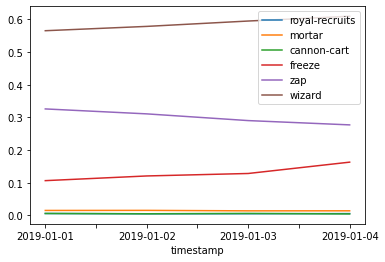

In [25]:
daily_mean = df.iloc[:100000].groupby(df.timestamp.map(lambda x: x[:10])).mean()
std = daily_mean.std().iloc[2:]
up = std.sort_values(ascending=True).index[:3].values.tolist()
down = std.sort_values(ascending=False).index[:3].values.tolist()
for card in up + down:
    daily_mean[card].rolling(1).mean().plot()
plt.legend()
plt.show()

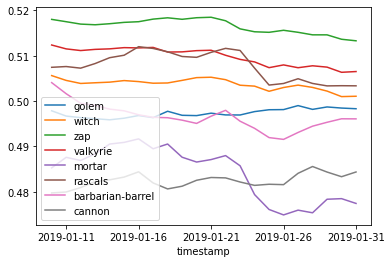

In [10]:
stds = pd.DataFrame()

for elem in importance.card.iloc[:20]:
    daily_mean = df[['has_won', 'timestamp', elem]][df[elem]].groupby(df.timestamp.map(lambda x: x[:10])).has_won.mean()
    std = daily_mean.std()
    stds = pd.concat([stds, pd.DataFrame({'std': std, 'card': elem}, index=[0])])

stds_small = stds.sort_values(by='std', ascending=True).iloc[:4].card.values.tolist()
stds_big = stds.sort_values(by='std', ascending=False).iloc[:4].card.values.tolist()

for elem in stds_small + stds_big:
    daily_mean = df[['has_won', 'timestamp', elem]][df[elem]].groupby(df.timestamp.map(lambda x: x[:10])).has_won.mean()
    daily_mean.rolling(10).mean().plot(label=elem)
plt.legend()
plt.show()

In [11]:
usage_arena = pd.DataFrame()
grouped = df.groupby('arena_id')

for elem in importance.card.iloc[:5]:
    usage = grouped.apply(lambda x: x[elem].mean())
    win = grouped.apply(lambda x: len(x[x[elem] & x['has_won']]) / len(x))
    d = pd.concat([usage.to_frame().T.add_prefix('usage_'), win.to_frame().T.add_prefix('win_')], axis=1)
    d['card'] = elem
    usage_arena = pd.concat([usage_arena, d])

usage_arena.set_index('card', inplace=True)
usage_arena

arena_id,usage_1,usage_2,usage_3,usage_4,usage_5,usage_6,usage_7,usage_8,usage_9,usage_10,...,win_4,win_5,win_6,win_7,win_8,win_9,win_10,win_11,win_12,win_13
card,,,,,,,,,,,,,,,,,,,,,
inferno-tower,0.007437,0.002894,0.026471,0.110739,0.093359,0.082480,0.091807,0.099581,0.108142,0.110708,...,0.057870,0.050657,0.045007,0.051658,0.056046,0.061113,0.062279,0.063850,0.065215,0.057710
witch,0.367134,0.555069,0.643124,0.643567,0.576800,0.527084,0.466527,0.421730,0.373787,0.323619,...,0.367493,0.322633,0.290564,0.259158,0.232382,0.204365,0.175488,0.151950,0.137853,0.116495
valkyrie,0.043907,0.342715,0.365461,0.362844,0.361000,0.379194,0.363800,0.357006,0.353519,0.337022,...,0.214769,0.207137,0.212871,0.205398,0.200810,0.198242,0.187108,0.176937,0.172907,0.145173
mortar,0.001716,0.000952,0.001177,0.002043,0.007632,0.013040,0.007344,0.006705,0.007925,0.008768,...,0.000951,0.003195,0.005382,0.003134,0.002905,0.003630,0.004260,0.005521,0.007227,0.009976
giant-skeleton,0.007723,0.178079,0.237554,0.184249,0.169406,0.155167,0.155398,0.150165,0.147533,0.133161,...,0.105438,0.096422,0.087696,0.088831,0.085329,0.083448,0.074179,0.069259,0.061679,0.039606


In [12]:
usage_arena.std(axis=0).sort_values(ascending=False)

arena_id
usage_3     0.264479
usage_4     0.251126
usage_2     0.236708
usage_5     0.228333
usage_6     0.215024
usage_7     0.191858
usage_8     0.175711
usage_9     0.159559
usage_1     0.158280
win_3       0.148472
win_4       0.145073
usage_10    0.142796
win_2       0.132686
win_5       0.128821
usage_11    0.127180
win_6       0.119558
usage_12    0.118716
usage_13    0.107860
win_7       0.107173
win_8       0.097547
win_1       0.093626
win_9       0.088177
win_10      0.078326
win_11      0.069974
win_12      0.066004
win_13      0.055719
dtype: float64

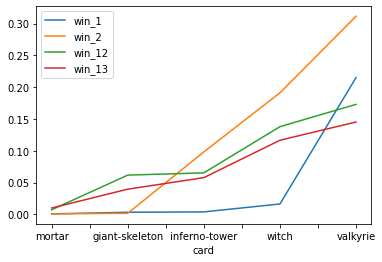

In [13]:
usage_arena['win_1'].sort_values().plot()
usage_arena['win_2'].sort_values().plot()
usage_arena['win_12'].sort_values().plot()
usage_arena['win_13'].sort_values().plot()
plt.legend()
plt.show()

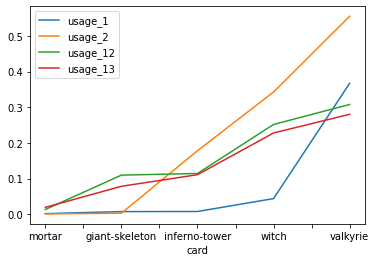

In [14]:
usage_arena['usage_1'].sort_values().plot()
usage_arena['usage_2'].sort_values().plot()
usage_arena['usage_12'].sort_values().plot()
usage_arena['usage_13'].sort_values().plot()
plt.legend()
plt.show()

/tmp/ipykernel_5966/1610588605.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  grouped = df.iloc[:1000].groupby('tag').mean()[player_deck]


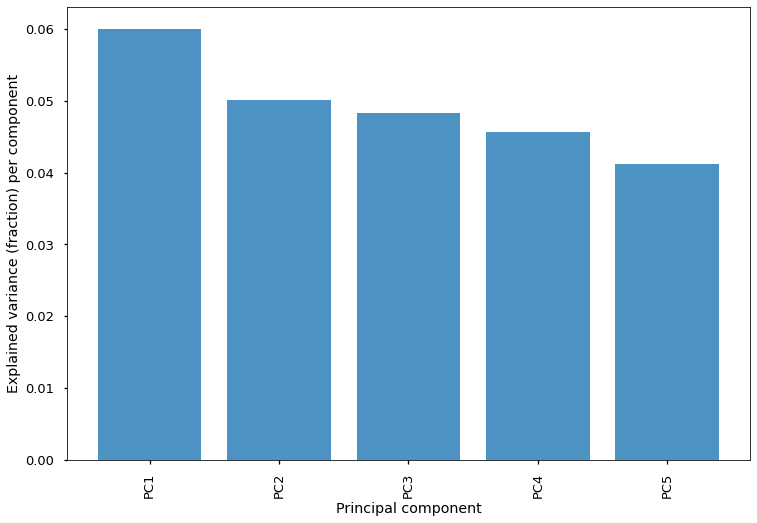

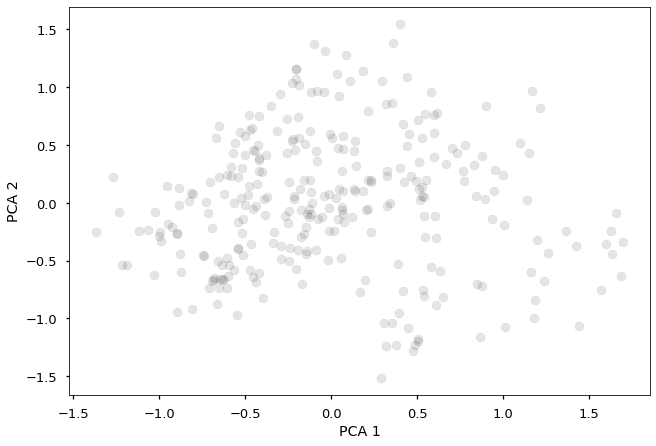

In [15]:
plt.style.use('seaborn-talk')

grouped = df.iloc[:1000].groupby('tag').mean()[player_deck]

pca = PCA(n_components=5)
transformed = pd.DataFrame(pca.fit_transform(grouped))
pca_explained_variance_bar(pca, alpha=0.8)
plt.show()

'''
plt.scatter(transformed[0], transformed[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
'''

In [1]:
for card_id in pca.components_.argsort(axis=1)[:3, -2:].flatten():
    grouped.iloc[:, card_id].sort_values().plot()
plt.legend()
plt.show()

NameError: name 'pca' is not defined

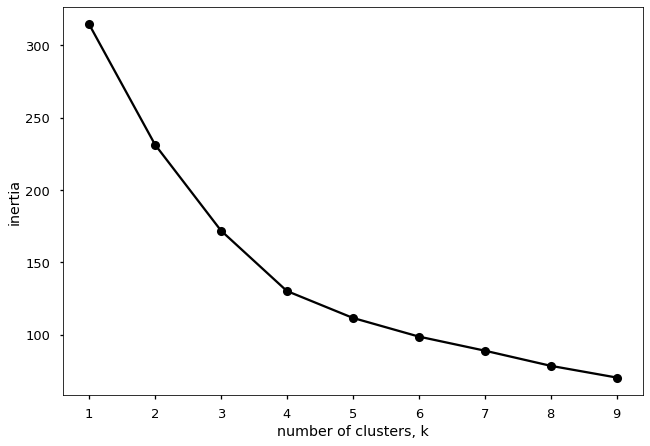

In [24]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(transformed.iloc[:, :3])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [25]:
model = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
model.fit_predict(transformed.iloc[:, :3])

Scene = dict(xaxis=dict(title='PCA_1-->'), yaxis=dict(title='PCA_2--->'), zaxis=dict(title='PCA_3--->'))

labels = model.labels_
trace = go.Scatter3d(x=transformed.iloc[:, 0], y=transformed.iloc[:, 1], z=transformed.iloc[:, 2], mode='markers',
                     marker=dict(color=labels, size=10, line=dict(color='black',width=10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [49]:
inpt = ['prince', 'giant', 'baby-dragon', 'tombstone']

def recommend(X, k, calculated):
    str_ = '_'.join(X)
    if str_ in calculated:
        return [], 0, calculated
    calculated.add(str_)
    new_cards = []
    df_local = df
    for elem in X:
        df_local = df_local[df_local[elem]]
    if len(df_local) > 0:
        for i in range(k):
            card_sets = pd.DataFrame()
            for new_elem in player_deck:
                df_local_ = df_local[df_local[new_elem]]
                win_ratio = df_local_["has_won"].mean()
                card_sets = pd.concat([card_sets, pd.DataFrame({'card': new_elem, 'win_ratio': win_ratio}, index=[0])])
            card_sets.sort_values('win_ratio', ascending=False, inplace=True)
            sd = card_sets.win_ratio.std()
            sd = 0 if sd is None else sd
            proposal = card_sets[card_sets.win_ratio >= card_sets.win_ratio.mean() + sd]
            elem = proposal.sample(n=1, weights='win_ratio')
            df_local = df_local[df_local[elem.card.item()]]
            new_cards.append(elem.card.item())
        return new_cards, elem.win_ratio.item(), calculated
    else:
        best_cards, win = None, 1
        for elems in list(itertools.combinations(X, 8-k-1)):
            new_cards, win_, calculated = recommend(elems, k+1, calculated)
            if win_ > win:
                win = win_
                best_cards = new_cards
        return best_cards, win, calculated

best_cards, win_ratio, _ = recommend(inpt, 4, set())
best_cards, win_ratio

(['bowler', 'the-log', 'ice-wizard', 'tombstone'],
 1.0,
 {'prince_giant_baby-dragon_tombstone'})